### 1. Importing the necesary modules :-

In [203]:
import numpy as np
import pandas as pd
import csv
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from datetime import datetime, timedelta, date
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
wind_actual = pd.read_csv('Wind_Actual.csv')
wind_forecast = pd.read_csv('Wind_Forecast.csv')

In [3]:
wind_actual=wind_actual.set_index('Date')

In [4]:
wind_forecast=wind_forecast.set_index('Date')

### Initialise the driver to access the link for data scrapping:

In [264]:
def initialise_driver(url):
    # initialise the dirver
    options = webdriver.SafariOptions()
    driver = webdriver.Safari(options=options)
    driver.implicitly_wait(10)
    driver.get(url)
    return driver

In [265]:

start_date = date(2024, 4, 1)
end_date = date.today()
df = pd.DataFrame(columns=['Date','HE','MW'])
url = 'https://dataminer2.pjm.com/feed/hourly_wind_power_forecast'

driver = initialise_driver(url)

# Search for the time input fields on the page
time_inputs = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.XPATH, "//input[@type='text' and contains(@class, 'time')]"))
)

# Add the time in every field 
time_value = "06:00"
for time_input in time_inputs:
    time_input.clear()
    time_input.send_keys(time_value)
    
    driver.implicitly_wait(20)
    time.sleep(2)
    
    
# For every date between start and end date scrape the required values    
while (start_date <= end_date):
    
    s_dt = start_date.strftime("%m/%d/%Y") 


    s_date_input = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//input[contains(@class, 'ui-column-filter')]"))
    )
    for sdts in s_date_input[:2]:
        sdts.clear()
        sdts.send_keys(s_dt)
        sdts.send_keys(Keys.ENTER)
        driver.implicitly_wait(20)
        time.sleep(2)

    time.sleep(2)
    submit_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "dm-datepicker-list-button"))
    )
    submit_button.click()
    time.sleep(2)
    
    # ** Capture the html script of the page after the data is loaded
    soup = BeautifulSoup(driver.page_source, 'html.parser') 
    results = []
    
    # Parse the html data to get the required fields
    for row in soup.find_all('tr')[2:]:
        data = row.find_all('td')

        date1 = data[3].find('div').text.strip()
        date2 = data[5].find('div').text.strip()

        dt1 = datetime.strptime(date1, '%m/%d/%Y %H:%M')
        dt2 = datetime.strptime(date2, '%m/%d/%Y %H:%M')
        if dt2.hour==0:
            HE = 24
        else:
            HE = dt2.hour
        Date = dt1.date()
        MW = data[6].find('span').find('span').text.strip()

        results.append([Date, HE, MW])
        
    df = df.append(pd.DataFrame(results, columns=['Date','HE','MW']), ignore_index=True)
    start_date += timedelta(days=1)
    

/var/folders/xc/6c2pzz2172x4x83lp41y7csm0000gn/T/ipykernel_11758/3799227847.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(results, columns=['Date','HE','MW']), ignore_index=True)


KeyboardInterrupt: 

In [207]:
driver.quit()

In [205]:
df_forecast = df
df_forecast.tail(24)

,Date,HE,MW
0,2024-04-20,13,"5,622.695"
1,2024-04-20,14,"5,847.127"
2,2024-04-20,15,"6,007.393"
3,2024-04-20,16,"6,119.938"
4,2024-04-20,17,"6,104.761"
5,2024-04-20,18,"5,882.646"
6,2024-04-20,19,"5,440.828"
7,2024-04-20,20,"4,690.841"
8,2024-04-20,21,"3,941.86"
9,2024-04-20,22,"3,257.461"


In [255]:

start_date = date(2024, 4, 1)
end_date = date.today()
df = pd.DataFrame(columns=['Date','HE','Area','MW'])
url = 'https://dataminer2.pjm.com/feed/wind_gen'

driver = initialise_driver(url)


# Add the time in every field 
for time_input in time_inputs:
    time_input.clear()
    if count == 0:
        time_input.send_keys("00:00")
        count += 1
    else:
        time_input.send_keys("23:59")
    driver.implicitly_wait(20)
    time.sleep(2)

# For every date between start and end date scrape the required values    
while (start_date <= end_date):
    

    s_dt = start_date.strftime("%m/%d/%Y") 


    s_date_input = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//input[contains(@class, 'ui-column-filter')]"))
    )
    for sdts in s_date_input[:2]:
        
        sdts.clear()
        sdts.send_keys(s_dt)
        sdts.send_keys(Keys.ENTER)
        driver.implicitly_wait(20)
        time.sleep(2)

    

    time.sleep(2)
    
    sdts.send_keys(Keys.ENTER)
    dropdown = driver.find_element(By.ID, "sel_area")
    select = Select(dropdown)
    select.select_by_visible_text('RTO')
    time_inputs = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//input[@type='text' and contains(@class, 'time')]"))
    )
    time.sleep(5)
    
    # ** Capture the html script of the page after the data is loaded
    soup = BeautifulSoup(driver.page_source, 'html.parser') 
    results = []
    
    # Parse the html data to get the required fields
    for row in soup.find_all('tr')[1:]:
        data = row.find_all('td')
        date1 = data[0].find('div').text.strip()
        date2 = data[1].find('div').text.strip()

        dt1 = datetime.strptime(date1, '%m/%d/%Y %H:%M')
        dt2 = datetime.strptime(date2, '%m/%d/%Y %H:%M')
        HE = dt2.hour+1
        Area = data[2].find('div').text.strip()
        Date = dt1.date()
        MW = data[3].find('span').find('span').text.strip()
        
        results.append([Date, HE,Area, MW])
        
    df = df.append(pd.DataFrame(results, columns=['Date','HE','Area','MW']), ignore_index=True)
    start_date += timedelta(days=1)
    
driver.quit()

/var/folders/xc/6c2pzz2172x4x83lp41y7csm0000gn/T/ipykernel_11758/2395970013.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(results, columns=['Date','HE','Area','MW']), ignore_index=True)
/var/folders/xc/6c2pzz2172x4x83lp41y7csm0000gn/T/ipykernel_11758/2395970013.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(results, columns=['Date','HE','Area','MW']), ignore_index=True)
/var/folders/xc/6c2pzz2172x4x83lp41y7csm0000gn/T/ipykernel_11758/2395970013.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(results, columns=['Date','HE','Area','MW']), ignore_index=True)


In [239]:
df_sorted = df.sort_values(by=['Date', 'HE'])

In [241]:
df_actual = df_sorted.groupby('Date')

In [243]:
df_actual.head()

,Date,HE,Area,MW
22,2024-04-20,1,RTO,0
21,2024-04-20,2,RTO,0
20,2024-04-20,3,RTO,0
19,2024-04-20,4,RTO,0
18,2024-04-20,5,RTO,0
45,2024-04-21,1,RTO,0
44,2024-04-21,2,RTO,0
43,2024-04-21,3,RTO,0
42,2024-04-21,4,RTO,0
41,2024-04-21,5,RTO,0


In [223]:
df_actual = df_actual.set_index('Date')

In [251]:
df_forecast = df_forecast.set_index('Date')

In [214]:
df_forecast['MW'] = df_forecast['MW'].str.replace(',', '').astype(float)

In [225]:
df_actual['MW'] = df_actual['MW'].str.replace(',', '').astype(float)

### Visualise the forecast data extracted from 1 April 2024

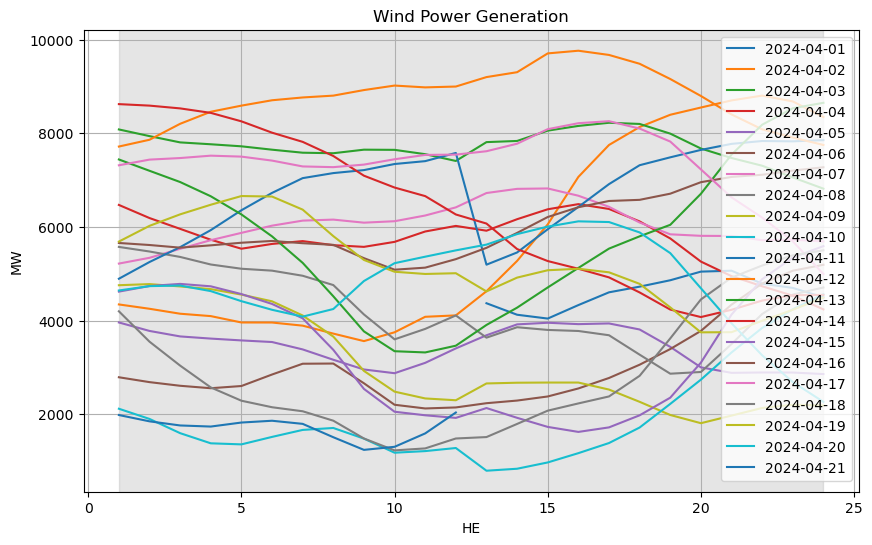

In [84]:
plt.figure(figsize=(10, 6))
for date, group in df_forecast.groupby('Date'):
    plt.plot(group['HE'], group['MW'], label=date.strftime('%Y-%m-%d'))

plt.axvspan(1, 24, color='grey', alpha=0.2)

plt.xlabel('HE')
plt.ylabel('MW')
plt.title('Wind Power Generation')
plt.legend()
plt.grid(True)
plt.show()

sorted_df_2 = df_actual.sort_index()
sorted_df=sorted_df_2.groupby(level='Date').apply(lambda x: x.sort_values('HE'))

In [216]:
df_actual = sorted_df

In [235]:
df_forecast

,HE,MW
Date,,
2024-04-20,13,5622.695
2024-04-20,14,5847.127
2024-04-20,15,6007.393
2024-04-20,16,6119.938
2024-04-20,17,6104.761
2024-04-20,18,5882.646
2024-04-20,19,5440.828
2024-04-20,20,4690.841
2024-04-20,21,3941.860


### Visualise the actual data extracted from 1 April 2024

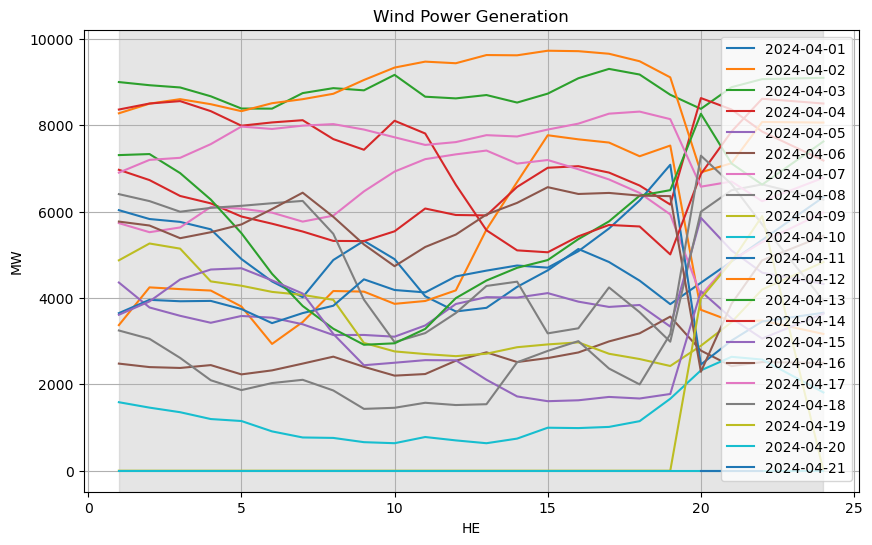

In [132]:
plt.figure(figsize=(10, 6))
for date, group in df_actual.groupby('Date'):
    plt.plot(group['HE'], group['MW'], label=date.strftime('%Y-%m-%d'))

plt.axvspan(1, 24, color='grey', alpha=0.2)

plt.xlabel('HE')
plt.ylabel('MW')
plt.title('Wind Power Generation')
plt.legend()
plt.grid(True)
plt.show()

In [258]:
wind_actual.head()

,HE,Area,MW
2023-01-01,1,RTO,6117.732
2023-01-01,2,RTO,6556.513
2023-01-01,3,RTO,5901.861
2023-01-01,4,RTO,5294.705
2023-01-01,5,RTO,4776.355


In [151]:
wind_actual.index = wind_actual.index.date

In [150]:
wind_forecast.head()

,HE,MW
2023-01-01,1,5898.113443
2023-01-01,2,6056.121206
2023-01-01,3,5191.992898
2023-01-01,4,4851.371052
2023-01-01,5,5371.115128


In [149]:
wind_forecast.index = wind_forecast.index.date

In [153]:
final_forecast = pd.concat([wind_forecast, df_forecast])

In [154]:
final_actual = pd.concat([wind_actual, df_actual])

In [161]:
final_forecast.index.name = 'Date'

In [159]:
final_actual.index.name = 'Date'

In [166]:
final_forecast

,HE,MW
Date,,
2023-01-01,1,5898.113443
2023-01-01,2,6056.121206
2023-01-01,3,5191.992898
2023-01-01,4,4851.371052
2023-01-01,5,5371.115128
...,...,...
2024-04-21,8,1508.044000
2024-04-21,9,1237.959000
2024-04-21,10,1303.516000


### ***Fin.***